<a href="https://colab.research.google.com/github/vinicius-pf/Challenge_DataScience/blob/Semana-3/Semana%203%20e%204/Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Data Science - Semana 3

Após a investigação da distribuição da variável target e análise das relações e correlações entre as variáveis na semana anterior, a empresa trouxe mais uma demana para a terceira semana.

Essa nova demanda é a respeito de um modelo de machine learning capaz de prever se o cliente irá evadir ou não. Para isso, serão utilizados os dados tratados após a [segunda semana](https://colab.research.google.com/github/vinicius-pf/Challenge_DataScience/blob/Semana-2/Semana%202/%20Analises_Graficas.ipynb).

Antes da criação do modelo, serão efetuadas etapas de pré-processamento de dados como *encoding* e balanceamento. Após isso, serão criados 3 modelos de machine learning que serão comparados entre si utilizando-se de métricas estatísticas e visuais. Após a decisão do melhor modelo, este será otimizado e entregue para a empresa.

Além da entrega do modelo de machine learning, também serão entregue os dados dos clientes que estavam com dados de `Evasão` na coluna, como definido na [primeira semana](https://github.com/vinicius-pf/Challenge_DataScience/blob/main/Semana%201/Tratamento_dos_Dados.ipynb).

## Importando os Dados

Os dados importados serão os mesmos tratados durante a [semana anterior](https://colab.research.google.com/github/vinicius-pf/Challenge_DataScience/blob/Semana-2/Semana%202/%20Analises_Graficas.ipynb).

In [171]:
import pandas as pd

In [172]:
url = 'https://raw.githubusercontent.com/vinicius-pf/Challenge_DataScience/Semana-3/Semana%203%20e%204/dados/dados_bruto.csv'


dados = pd.read_csv(url, index_col = 'Unnamed: 0')

In [173]:
dados.head()

,ID_Cliente,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiplas,Servico_Internet,...,Adiconal_Protecao,Adicional_Suporte,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Valor_Dia,Conta_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,2.19,Sim,Cheque,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,2.00,Não,Cheque,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra Óptica,...,Sim,Não,Não,Não,Mensal,2.46,Sim,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra Óptica,...,Sim,Não,Sim,Sim,Mensal,3.27,Sim,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra Óptica,...,Não,Sim,Sim,Não,Mensal,2.80,Sim,Cheque,83.9,267.40


Com a importação concluída, pode-se passar para a etapa do pré processamento dos dados.

## Preparando os dados

### pandas profiling

A biblioteca [Pandas Profiling](https://github.com/ydataai/pandas-profiling) permite uma análise visual rápida e interativa. Apesar dos dados já terem passado por um processo de [análise exploratória](https://colab.research.google.com/github/vinicius-pf/Challenge_DataScience/blob/Semana-2/Semana%202/%20Analises_Graficas.ipynb), é interessante aplicar a análise com esta biblioteca para confirmar alguns pontos e entender melhor alguns comportamentos.

In [174]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import pandas_profiling

relatorio = pandas_profiling.ProfileReport(dados)
relatorio

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Com as análises concluídas, é notado que a coluna `ID_Cliente` possue apenas valores únicos, então ela pode ser retirada do modelo.

In [176]:
dados.drop('ID_Cliente', axis = 1, inplace = True)

Também há colunas em que existe correlação forte entre si. A coluna criada na primeira semana a pedido da empresa, `Valor_Dia`, possue forte correlação com a coluna `Valor_Mensal`, por isso será excluida do modelo. Pelo mesmo motivo a coluna `Valor_Total` também será excluída.

In [177]:
dados.drop(columns = ['Valor_Dia', 'Valor_Total'], axis = 1, inplace = True)

Além disso, percebe-se um desbalanceamento da variável target. Antes do balanceamento, porém, será necessário aplicar uma técnica de *encoding* nos dados.

### Aplicando técnicas de *Encoding*

Como modelos de machine learning não sabem computar dados em texto, apenas em números, será necessário alterar os valores em texto das colunas categóricas e atribuir valores numéricos para os mesmos. O nome dessa técnica é *encoding*.

[Nas análises da primeira semana](https://github.com/vinicius-pf/Challenge_DataScience/blob/main/Semana%201/Tratamento_dos_Dados.ipynb), foi percebido que as colunas `Evasao`, `Eh_Idoso`, `Tem_Parceiro`, `Tem_Dependentes`, `Servico_Telefone` e `Conta_Digital` possuem apenas 2 valores: `Sim` e `Não`. Para esse projeto, os valores serão substituidos por `1`, para `Sim` e `0` para `Não`. A coluna `Genero` receberá valores `0` e `1` para `Masculino` e `Feminino` respectivamente.

As outas variáveis categóricas do sistema possuem 3 ou mais valores, então deverá ser aplicado um método de encoding diferente.

In [178]:
mapa = {'Sim': 1, 'Não': 0}

In [179]:
colunas = ['Evasao', 'Eh_Idoso', 'Tem_Parceiro', 'Tem_Dependentes', 'Servico_Telefone', 'Conta_Digital']

for coluna in colunas: 
    dados[coluna].replace(mapa, inplace = True)

In [180]:
dados.head()

,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiplas,Servico_Internet,Adiconal_Seguranca,Adicional_Backup,Adiconal_Protecao,Adicional_Suporte,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Conta_Digital,Metodo_Pagamento,Valor_Mensal
0,0,Feminino,0,1,1,9,1,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,1,Cheque,65.6
1,0,Masculino,0,0,0,9,1,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,0,Cheque,59.9
2,1,Masculino,0,0,0,4,1,Não,Fibra Óptica,Não,Não,Sim,Não,Não,Não,Mensal,1,Cheque eletrônico,73.9
3,1,Masculino,1,1,0,13,1,Não,Fibra Óptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,1,Cheque eletrônico,98.0
4,1,Feminino,1,1,0,3,1,Não,Fibra Óptica,Não,Não,Não,Sim,Sim,Não,Mensal,1,Cheque,83.9


In [181]:
mapa = {'Feminino': 1, 'Masculino': 0}

dados['Genero'].replace(mapa, inplace = True)

Para as outras variáveis categóricas do sistema, deverá ser utilizado outro método. Existem diversas abordagens diferentes, porém existem 2 que são mais utilizadas no mercado: `Label Encoding` e `One-Hot Encoding`.

Segundo [esse site](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/), a técnica `Label Encoding` designa um número inteiro para cada valor, de acordo com a ordem alfabética. Sua principal vantagem está em não criar novas colunas, simplificando o dataset e diminuindo o tamanho final do sistema. Porém, como os valores são dados de acordo com uma ordem, o modelo de machine learning pode entender isso como um padrão e criar relações que não existem.

A técnica de `One-Hot Encoding` cria novas colunas baseadas na variável categórica utilizando valores 0 e 1 para cada característica. Isso evita uma ordenação indesejada, porém aumenta o número de colunas, aumentando a complexidade, o tamanho e o tempo de execução do sistema.

Por conta das características deste dataset, foi definido utilizar o método `One-Hot Encoding`.

Para efetuar o método de encoding dos dados, será usada a biblioteca [Pandas](https://pandas.pydata.org/docs/index.html) com seu método [.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) que irá criar as colunas de acordo com a técnica desejada. O método, ao aplicar o *encoding*, já elimina as colunas categóricas do sistema.

In [182]:
categoricos = ['Linhas_Multiplas', 'Servico_Internet',
               'Adiconal_Seguranca', 'Adicional_Backup', 'Adiconal_Protecao',
               'Adicional_Suporte', 'Streaming_TV', 'Streaming_Filmes',
               'Tipo_Contrato', 'Metodo_Pagamento']


dados = pd.get_dummies(data = dados, columns = categoricos)

In [183]:
dados.head()

,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Conta_Digital,Valor_Mensal,Linhas_Multiplas_Não,...,Streaming_Filmes_Não,Streaming_Filmes_Sem serviço de internet,Streaming_Filmes_Sim,Tipo_Contrato_Anual,Tipo_Contrato_Bianual,Tipo_Contrato_Mensal,Metodo_Pagamento_Cartão de crédito (automática),Metodo_Pagamento_Cheque,Metodo_Pagamento_Cheque eletrônico,Metodo_Pagamento_Tranferência bancária (automática)
0,0,1,0,1,1,9,1,1,65.6,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,9,1,0,59.9,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,4,1,1,73.9,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,1,0,13,1,1,98.0,1,...,0,0,1,0,0,1,0,0,1,0
4,1,1,1,1,0,3,1,1,83.9,1,...,1,0,0,0,0,1,0,1,0,0


Inicialmente foi percebido que a base de dados continha 23 colunas. Após a aplicação do `One-Hot Encoding`, a base de dados ficou com 43 colunas. Caso existissem mais valores distintos para as categorias, o número de colunas ficaria ainda maior.

Além do problema de se criar novas colunas e aumentar o tamanho da base, é possível também que as novas variáveis fiquem muito dependente entre si. Esse comportamento é chamado de [multicolinearidade](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/). Isso pode ser um problema em sistemas que utilizam a regressão.

Durante os testes, no entanto, a biblioteca utilizada para o cálculo do fator de influencia(VIF) entre as variáveis se mostrou inconsistente. Primeiramente apenas a variável `Valor_Mensal` apresentou um [valor de VIF acima de 5, que é considerado significativo](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/). Porém, ao executar novamente o código, o método apresentou um erro e não foi possível confirmar o valor.

Como apenas a coluna `Valor_Mensal` apresentou um valor de VIF considerado importante, ela será mantida para as próximas análises.

Após a aplicação das técnicas de *encoding*, é possível passar para a etapa de balanceamento dos dados.

### Balanceando os dados

In [184]:
dados['Evasao'].value_counts()

0    5174
1    1869
Name: Evasao, dtype: int64

A variável target está desbalanceada, pois há mais clientes que não evadiram do que clientes que evadiram. Caso a base de dados continue desbalanceada, o modelo de machine learning pode apresentar métricas boas, apesar de não conseguir acertar as suas previsões. 

Para balancear a variável target, deve-se decidir entre *oversampling* e *undersampling*. Os dois métodos alteram a base de dados para que a variável target fique balanceada. Quando se aplica o *undersampling*, são removidas linhas com o intuito de diminuir a característica com maior contagem. O oversampling funciona ao contrário, criando novas linhas com a característica de menor contagem.

Os dois métodos tem suas vantagens e desvantagens. Para este projeto, será utilizado o método *oversampling*. Ele é útil por não remover informações do sistema. Porém esse método é mais sucetível a *overfitting*, então deve-se acompanhar as métricas com mais atenção.

Para aplicar o *oversampling*, será utilizado o método [SMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html). Para balancear o dataset, são criadas linhas sintéticas com base nos dados já existentes.

In [185]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


Para executar o balanceamento, é necessário separar os dados em variável *target* e *features*. Como o algoritimo apresenta variações de resultados por conta de uma aleatoriedade intríseca ao mesmo, será definida uma *SEED*. Essa *SEED* vai permitir que os resultados sejam replicados por outras pessoas.

De acordo com Douglas Adams, em seu livro O Guia do Mochileiro das Galáxias, a resposta sobre a vida, o universo e tudo o mais é 42. Por isso esse número será utilizado.

In [186]:
from imblearn.over_sampling import SMOTE

SEED = 42

smote = SMOTE(random_state = SEED)

X = dados.drop('Evasao', axis = 1)
y = dados['Evasao']

In [187]:
x_resampled, y_resampled = smote.fit_resample(X,y)

dados_balanceados = pd.concat([y_resampled,x_resampled], axis = 1)
dados_balanceados.head()

,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Conta_Digital,Valor_Mensal,Linhas_Multiplas_Não,...,Streaming_Filmes_Não,Streaming_Filmes_Sem serviço de internet,Streaming_Filmes_Sim,Tipo_Contrato_Anual,Tipo_Contrato_Bianual,Tipo_Contrato_Mensal,Metodo_Pagamento_Cartão de crédito (automática),Metodo_Pagamento_Cheque,Metodo_Pagamento_Cheque eletrônico,Metodo_Pagamento_Tranferência bancária (automática)
0,0,1,0,1,1,9,1,1,65.6,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,9,1,0,59.9,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,4,1,1,73.9,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,1,0,13,1,1,98.0,1,...,0,0,1,0,0,1,0,0,1,0
4,1,1,1,1,0,3,1,1,83.9,1,...,1,0,0,0,0,1,0,1,0,0


In [188]:
dados_balanceados['Evasao'].value_counts()

0    5174
1    5174
Name: Evasao, dtype: int64

Com a variável target balanceada, é possível partir para a última etapa da preparação dos dados e normalizar as variáveis numéricas.

### Normalizando os dados numéricos

A normalização de dados é necessária para as colunas numéricas, pois há uma diferença em grandezas entre elas. Essa etapa [melhora a performance e a estabilidade do modelo treinado](https://developers.google.com/machine-learning/data-prep/transform/normalization).

Para a normalização dessa base de dados será utilizada a técnica de escala linear. Os valores presentes nas colunas serão escalonados para valores entre 0 e 1, com base nos valores máximo e mínimo das colunas.

A normalização altera os valores numéricos para que fiquem mais próximos uns dos outros, porém não altera as características de correlação e distribuição das variáveis.

In [189]:
numericas = ['Tempo_Contrato', 'Valor_Mensal']

for coluna in numericas:

    minimo = dados_balanceados[coluna].min()
    maximo = dados_balanceados[coluna].max()

    dados_balanceados[coluna] = (dados_balanceados[coluna] - minimo)/(maximo-minimo)

dados_balanceados.head()

,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Conta_Digital,Valor_Mensal,Linhas_Multiplas_Não,...,Streaming_Filmes_Não,Streaming_Filmes_Sem serviço de internet,Streaming_Filmes_Sim,Tipo_Contrato_Anual,Tipo_Contrato_Bianual,Tipo_Contrato_Mensal,Metodo_Pagamento_Cartão de crédito (automática),Metodo_Pagamento_Cheque,Metodo_Pagamento_Cheque eletrônico,Metodo_Pagamento_Tranferência bancária (automática)
0,0,1,0,1,1,0.125000,1,1,0.471144,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0.125000,1,0,0.414428,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0.055556,1,1,0.553731,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,1,0,0.180556,1,1,0.793532,1,...,0,0,1,0,0,1,0,0,1,0
4,1,1,1,1,0,0.041667,1,1,0.653234,1,...,1,0,0,0,0,1,0,1,0,0


## Machine Learning

Com os dados processados, é possível começar a criar e classificar os modelos de machine learning. Para este projeto, serão utilizados modelos classificadores, tendo em vista a característica da variável target.

### Separando em treino e teste

Antes da criação dos modelos, é necessário dividir os dados em dados de treino e de teste. Para o treinamento e escolha do melhor classificador, será utilizado o método [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) da biblioteca [Scikit Learn](https://scikit-learn.org/stable/index.html). Para a otimização e validação  do modelo serão utilizados outros meios de separação da base de dados.

In [190]:
from sklearn.model_selection import train_test_split

SEED = 42

X = dados_balanceados.drop('Evasao', axis = 1)
y = dados_balanceados['Evasao']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify = y)

### Criando modelos

Após a separação dos dados, pode dar início a criação e avaliação dos modelos de machine learning. Para esse projeto serão criados 5 modelos de machine learning que serão comparados entre si. 

Primeiramente será criado um modelo que será o controle. Esse será um Dummy Classifier, que irá prever todos os resultados do mesmo jeito. Serão criados então, mais 4 modelos para comparação. Um modelo de regressão logística, um classificador Random Forest, um Support Vector Machine e um classificador K-Nearest Neighbors. Esses modelos foram considerados de acordo com um [infográfico da bilbioteca scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) e um [artigo do site Towards Data Science](https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d).

Para simplificar o código, foi definida uma função que irá treinar o modelo e retornar as previsões do mesmo. Essas previsões serão guardadas em um dicionário Pyhton.

In [191]:
def executa_modelo(modelo):

    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)

    return y_pred

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

SEED = 42

dummy = DummyClassifier(random_state = SEED)
lr = LogisticRegression(max_iter = 1000, random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
svc = SVC(random_state = SEED, probability = True)
knc = KNeighborsClassifier()

modelos = [dummy, lr, rf, svc, knc]
resultados = {}


for modelo in modelos:
    y_pred = executa_modelo(modelo)
    resultados[modelo] = y_pred

resultados

{DummyClassifier(random_state=42): array([1, 1, 1, ..., 1, 1, 1]),
 KNeighborsClassifier(): array([1, 1, 0, ..., 1, 1, 1]),
 LogisticRegression(max_iter=1000, random_state=42): array([1, 1, 0, ..., 1, 0, 1]),
 RandomForestClassifier(random_state=42): array([1, 1, 0, ..., 1, 1, 1]),
 SVC(probability=True, random_state=42): array([1, 1, 0, ..., 1, 0, 1])}

### Comparando as métricas

Com os modelos treinados e as previsões feitas, os modelos podem ser comparados utilizando de métricas de machine learning. Serão usadas 5 métricas para a escolha dos melhores modelos. Após a escolha, será utilizada outra métrica para comparação e definição do modelo que será otimizado e validado:

- Acurácia, que mostra a taxa de acerto do modelo;
- Precisão, que é a taxa de acerto ao se considerar apenas os clientes que o modelo previu que ia cancelar o contrato;
- *Recall*, que é a taxa de acerto do modelo, ao se considerar apenas os clientes que cancelaram o contrato;
- F1, que é a média harmonica entre a precisão e o *recall*;
- Matriz de confusão, que mostra a contagem dos acertos e dos erros do modelo de machine learning.

In [193]:
from sklearn import metrics

def valida_modelo(modelo, y_test, y_pred):
    acuracia = metrics.accuracy_score(y_test, y_pred).round(4)
    precisao = metrics.precision_score(y_test, y_pred).round(4)
    recall = metrics.recall_score(y_test, y_pred).round(4)
    f1 = metrics.f1_score(y_test, y_pred).round(4)

    metricas = [acuracia, precisao, recall, f1]

    matriz = metrics.confusion_matrix(y_test, y_pred)

    return metricas, matriz

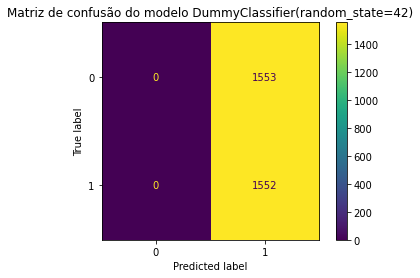

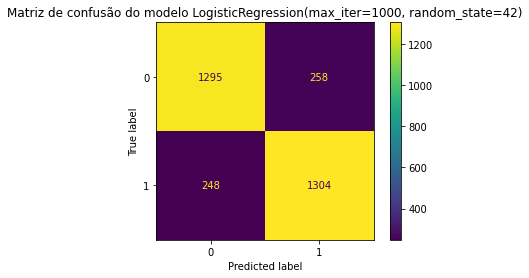

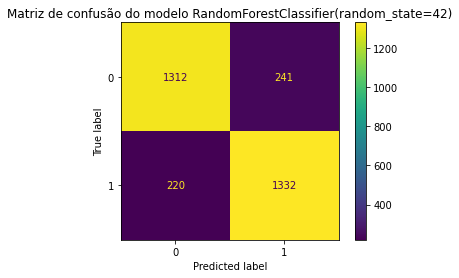

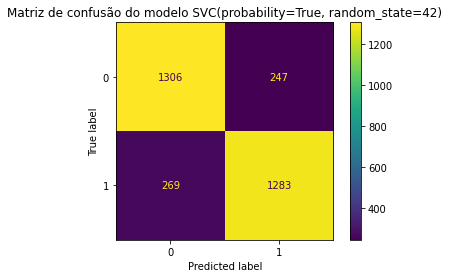

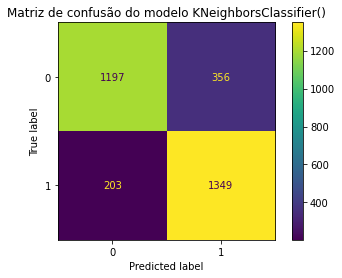

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

index = ['Acurácia', 'Precisão', 'Recall', 'F1']
df = pd.DataFrame(index = index)

for modelo, resultado in resultados.items():
    df[modelo], matriz = valida_modelo(modelo, y_test, resultado)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz)
    disp.plot()
    plt.title(f'Matriz de confusão do modelo {modelo}')
    

In [195]:
df.columns = ['Dummy', 'LogisticRegression', 'RandomForest', 'SVC', 'K-Neighbors']
df.T.style.highlight_max(color='green')

,Acurácia,Precisão,Recall,F1
Dummy,0.499800,0.499800,1.000000,0.666500
LogisticRegression,0.837000,0.834800,0.840200,0.837500
RandomForest,0.851500,0.846800,0.858200,0.852500
SVC,0.833800,0.838600,0.826700,0.832600
K-Neighbors,0.820000,0.791200,0.869200,0.828400


Todos os modelos apresentaram resultado melhor que o modelo de base para as métricas de acurácia e precisão. Percebe-se, então, que é possível resolver o problema da empresa implementando algum modelo de machine learning. Dentre os modelos analisados, o modelo Random Forest Classifier apresentou o melhor resultado nas métricas analisadas. 

Apesar disso, uma outra mérica pode ser utilizada para entender o comportamento e comparar os modelos. Essa métrica se chama curva ROC. Em testes, exibir 4 modelos na mesma curva fez com que o gráfico ficasse com difícil leitura, por isso foram postos apenas os modelos Random Forest, que teve os melhores resultados e o modelo Logistic Regression, foi o segundo modelo com as melhores métricas.

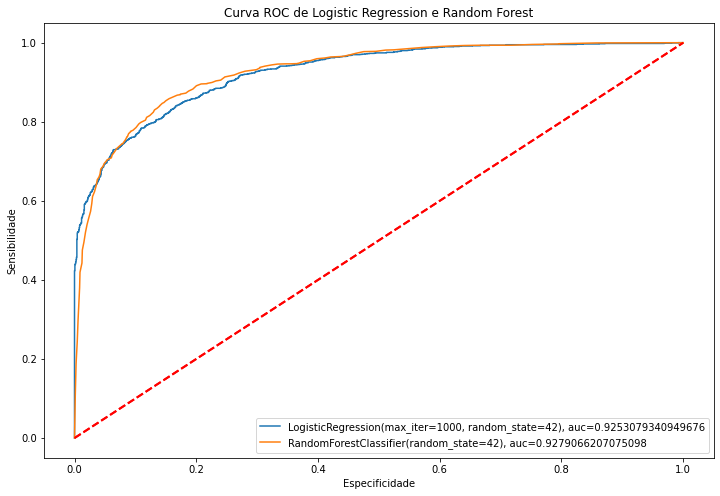

In [196]:
for modelo in [lr, rf]:
                
    y_pred_proba = modelo.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    plt.rcParams['figure.figsize'] = (12.,8.)
    plt.plot(fpr,tpr,label = f'{modelo}, auc={auc}')
    plt.plot([0,1],[0,1],color = 'red', lw = 2, linestyle = '--')
    plt.legend(loc = 4)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.title('Curva ROC de Logistic Regression e Random Forest')

Analisando o gráfico e o valor de área sob a curva, percebe-se que o modelo RandomForest teve um resultado melhor para este dataset. Apesar disso, o modelo Logistic Regression obteve um bom resultado, além de iniciar melhor os testes.

Com a escolha feita, é necessário efetuar a validação do modelo e sua otimização.

### Validando o modelo escolhido

Com o modelo RandomForest escolhido, primeiro será feita uma validação cruzada utilizando o método [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate). Para a estratégia de separação da base em treino e teste será utilizado o método [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html). Essa estratégia garante, aproximadamente, a mesma distribuição de valores da variável target em cada divisão feita pelo modelo.

In [197]:
def imprime_resultado(resultados):

    acuracia_teste = resultados['test_score'].mean() * 100
    acuracia_treino = resultados['train_score'].mean() * 100

    print(f'Acurácia: teste = {acuracia_teste:.2f}, treino = {acuracia_treino:.2f}')

In [198]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


def validacao_cruzada(modelo):
    cv = StratifiedKFold(n_splits = 10)
    resultados = cross_validate(modelo, X, y, cv = cv, return_train_score=True)
    imprime_resultado(resultados)

In [199]:
SEED = 42

modelo = RandomForestClassifier(random_state = SEED)
validacao_cruzada(modelo)

Acurácia: teste = 85.24, treino = 99.80


Aplicando a validação cruzada e comparando com o modelo inicial, foi percebido que as métricas de acurácia e precisão se manteram no mesmo nível para os testes. Porém, para os dados de treino, os valores foram acima de 99%, o que pode indicar um *overfit* do modelo. Por isso, o mesmo deve ser otimizado para os dados, com o objetivo de melhorar o resultado da métrica nos grupos de testes.

### Otimizando o melhor modelo

Para otimizar o modelo, serão utilizados algoritimos de busca de parâmetros. Esses algoritimos pesquisam de forma aleatória ou completa um grid de possibilidades para os parâmetros, dependendo do modo de escolha. Em testes, alguns algoritimos levaram até 2 horas de execução e não trouxeram resultados significativos quando testados com 6 parâmetros.

Para diminuir o tempo de execução para esse projeto, será utilizado o método da biblioteca scikit-learn [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). Este método testa algumas combinações dos parâmetros e retorna o melhor modelo dentre os treinados. Como não são todos os parâmetros que são testados, o resultado pode ser melhorado com outros algoritimos.

Os parâmetros selecionados foram sugeridos [neste artigo](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/) além de analisados na [documentação do modelo](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Os hiperparâmetros selecionados para a otimização foram:

- max_features, que é a quantidade de variáveis a serem consideradas em cada divisão;
- n_estimators, que é a quantidade total da floresta;
- min_samples_leaf, que é o mínimo de informações contidas no último nível de cada árvore;
- max_depth, o tamanho total de cada árvore.

In [208]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

SEED = 42

modelo = RandomForestClassifier(random_state = SEED)

espaco_de_parametros = {
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : np.arange(50,400,step=50),
    'min_samples_leaf' : np.arange(50,516,step=32),
    'max_depth' : np.arange(5,21,step=1)
}

busca = RandomizedSearchCV(modelo,
                     param_distributions = espaco_de_parametros,
                     cv = StratifiedKFold(n_splits = 10),
                     n_jobs = -1,
                     n_iter = 20,
                     random_state = SEED,
                     scoring = 'accuracy')

busca.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 50,  82, 114, 146, 178, 210, 242, 274, 306, 338, 370, 402, 434,
       466, 498]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])},
                   random_state=42, scoring='accuracy')

Após a otimização dos hiperparâmetros, é necessário efetuar uma nova validação cruzada.

In [210]:
SEED = 42

modelo = RandomForestClassifier(**busca.best_params_, random_state = SEED)

validacao_cruzada(modelo)

Acurácia: teste = 81.45, treino = 82.32


O modelo apresentou piora nas métricas avaliadas em conjunto com a validação cruzada. Apesar de mais rápido, não se conseguiu melhorar o resultado do modelo. Provavelmente a escolha por balancear os dados utilizando oversampling pode ter feito com que o modelo não consiga ter melhor avaliado.

### Utilizando os dados de `Churn` em branco

Apesar dos resultados não apresentarem melhora, o modelo tem acurácia base de 85%. Por isso ele será utilizado para prever quais os clientes dos que possuíam valor nulo na coluna target podem cancelar o plano.

In [231]:
url = 'https://raw.githubusercontent.com/vinicius-pf/Challenge_DataScience/Semana-3/Semana%203%20e%204/dados/dados_evasao_vazio.csv'
dados_vazio = pd.read_csv(url)

In [232]:
dados_vazio.head()

,ID_Cliente,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiplas,Servico_Internet,...,Adiconal_Protecao,Adicional_Suporte,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Valor_Dia,Conta_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0047-ZHDTW,NaN,Feminino,Não,Não,Não,11,Sim,Sim,Fibra Óptica,...,Não,Não,Não,Não,Mensal,2.63,Sim,Tranferência bancária (automática),79.00,929.30
1,0120-YZLQA,NaN,Masculino,Não,Não,Não,71,Sim,Não,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Bianual,0.66,Sim,Cartão de crédito (automática),19.90,1355.10
2,0154-QYHJU,NaN,Masculino,Não,Não,Não,29,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,1.96,Sim,Cheque eletrônico,58.75,1696.20
3,0162-RZGMZ,NaN,Feminino,Sim,Não,Não,5,Sim,Não,DSL,...,Não,Sim,Não,Não,Mensal,2.00,Não,Cartão de crédito (automática),59.90,287.85
4,0274-VVQOQ,NaN,Masculino,Sim,Sim,Não,65,Sim,Sim,Fibra Óptica,...,Sim,Não,Sim,Sim,Anual,3.44,Sim,Tranferência bancária (automática),103.15,6792.45


#### Preparando os dados

Após importar os dados, estes passarão pelo mesmo processo de pré-processamento. Serão excluídas as colunas extras e também a coluna `Evasao`, que não possui informações.

In [233]:
dados_novos = dados_vazio.drop(columns = ['ID_Cliente','Valor_Dia', 'Valor_Total', 'Evasao'], axis = 1)

In [234]:
mapa = {'Sim': 1, 'Não': 0}

In [235]:
colunas = ['Eh_Idoso', 'Tem_Parceiro', 'Tem_Dependentes', 'Servico_Telefone', 'Conta_Digital']

for coluna in colunas: 
    dados_novos[coluna].replace(mapa, inplace = True)

In [236]:
mapa = {'Feminino': 1, 'Masculino': 0}

dados_novos['Genero'].replace(mapa, inplace = True)

In [237]:
categoricos = ['Linhas_Multiplas', 'Servico_Internet',
               'Adiconal_Seguranca', 'Adicional_Backup', 'Adiconal_Protecao',
               'Adicional_Suporte', 'Streaming_TV', 'Streaming_Filmes',
               'Tipo_Contrato', 'Metodo_Pagamento']


dados_novos = pd.get_dummies(data = dados_novos, columns = categoricos)

In [238]:
numericas = ['Tempo_Contrato', 'Valor_Mensal']

for coluna in numericas:

    minimo = dados_novos[coluna].min()
    maximo = dados_novos[coluna].max()

    dados_novos[coluna] = (dados_novos[coluna] - minimo)/(maximo-minimo)

dados_novos.head()

,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Conta_Digital,Valor_Mensal,Linhas_Multiplas_Não,Linhas_Multiplas_Sem serviço de telefone,...,Streaming_Filmes_Não,Streaming_Filmes_Sem serviço de internet,Streaming_Filmes_Sim,Tipo_Contrato_Anual,Tipo_Contrato_Bianual,Tipo_Contrato_Mensal,Metodo_Pagamento_Cartão de crédito (automática),Metodo_Pagamento_Cheque,Metodo_Pagamento_Cheque eletrônico,Metodo_Pagamento_Tranferência bancária (automática)
0,1,0,0,0,0.140845,1,1,0.622417,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0.985915,1,1,0.011880,1,0,...,0,1,0,0,1,0,1,0,0,0
2,0,0,0,0,0.394366,1,1,0.413223,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0.056338,1,0,0.425103,1,0,...,1,0,0,0,0,1,1,0,0,0
4,0,1,1,0,0.901408,1,1,0.871901,0,0,...,0,0,1,1,0,0,0,0,0,1


#### Inserindo no modelo

Com os dados tratados, é posssível incluir os mesmos no modelo de machine learning melhor avaliado. Após isso, as previsões serão salvas e enviadas à empresa.'

In [239]:
from sklearn.ensemble import RandomForestClassifier

SEED = 42

modelo = RandomForestClassifier(random_state=SEED)
modelo.fit(X_train, y_train)
previsao = modelo.predict(dados_novos)

dados_vazio['Evasao'] = previsao
dados_vazio.head()

,ID_Cliente,Evasao,Genero,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiplas,Servico_Internet,...,Adiconal_Protecao,Adicional_Suporte,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Valor_Dia,Conta_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0047-ZHDTW,1,Feminino,Não,Não,Não,11,Sim,Sim,Fibra Óptica,...,Não,Não,Não,Não,Mensal,2.63,Sim,Tranferência bancária (automática),79.00,929.30
1,0120-YZLQA,0,Masculino,Não,Não,Não,71,Sim,Não,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Bianual,0.66,Sim,Cartão de crédito (automática),19.90,1355.10
2,0154-QYHJU,0,Masculino,Não,Não,Não,29,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,1.96,Sim,Cheque eletrônico,58.75,1696.20
3,0162-RZGMZ,1,Feminino,Sim,Não,Não,5,Sim,Não,DSL,...,Não,Sim,Não,Não,Mensal,2.00,Não,Cartão de crédito (automática),59.90,287.85
4,0274-VVQOQ,0,Masculino,Sim,Sim,Não,65,Sim,Sim,Fibra Óptica,...,Sim,Não,Sim,Sim,Anual,3.44,Sim,Tranferência bancária (automática),103.15,6792.45


In [240]:
dados_vazio.to_csv('previsoes.csv', index = False)

## Considerações finais

Com a previsão feita, o projeto se encaminha para um fim. No entanto, ainda é necessário entender melhor o comportamento dos algoritimos de otimização dos modelos de machine learning para entender o motivo de não ter havido melhora significativa para as métricas analisadas.

Apesar de não haver melhora, o sistema ainda prevê com 80% de acurácia se um cliente irá ou não cancelar. Isso pode ajudar a empresa nesse momento, enquanto ela também procura ações para melhorar seus serviços de internet e manter clientes com menor tempo de contrato.